In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [7]:
df =pd.read_csv('/content/Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.shape

(10000, 14)

In [12]:
df.duplicated().sum()

0

In [13]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [14]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [15]:
# Changing the catogorical column into numerical one and dropping some columns to avoid the multicolinearity
# If an entry is France, both Geography_Germany and Geography_Spain will be 0.
# If an entry is Germany, Geography_Germany will be 1, and Geography_Spain will be 0.
# If an entry is Spain, Geography_Germany will be 0, and Geography_Spain will be 1.

df =pd.get_dummies(df,columns=['Geography','Gender'] ,drop_first=True,)


In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
X =df.drop(columns=['Exited'])
y =df['Exited']

In [18]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
#As values are very large creating the diffrences we will use StandardScalar to Scale it in a range
from sklearn.preprocessing import StandardScaler
X_train = X_train.drop(columns=['Surname'])
X_test = X_test.drop(columns=['Surname'])
scaler =StandardScaler()
X_train_trf =scaler.fit_transform(X_train)
X_test_trf =scaler.transform(X_test)

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model =Sequential()

# Adding Hidden layers and input layer
model.add(Dense(11,activation='sigmoid',input_dim =13))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             154 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430 (1.68 KB)

 Trainable params: 430 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history =model.fit(X_train,y_train,batch_size=50,epochs=500,verbose=1,validation_split=0.2)

Epoch 1/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4971 - val_accuracy: 0.7969 - val_loss: 0.5047
Epoch 2/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7892 - loss: 0.5151 - val_accuracy: 0.7969 - val_loss: 0.5047
Epoch 3/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7887 - loss: 0.5158 - val_accuracy: 0.7969 - val_loss: 0.5047
Epoch 4/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4982 - val_accuracy: 0.7969 - val_loss: 0.5047
Epoch 5/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: 0.5008 - val_accuracy: 0.7969 - val_loss: 0.5047
Epoch 6/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.5106 - val_accuracy: 0.7969 - val_loss: 0.5047
Epoch 7/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.5001 - val_accuracy: 0.7969 - val_loss: 0.5047
Epoch 8/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.5084 - val_accu

In [52]:
y_pred =model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
y_pred

array([[0.20417494],
       [0.20417494],
       [0.20417494],
       ...,
       [0.20417494],
       [0.20417494],
       [0.20417494]], dtype=float32)

In [54]:
Y_pred =y_pred.argmax(axis=1)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred_classes = (y_pred > 0.5).astype(int)

In [57]:
accuracy_score(y_test,y_pred_classes)

0.7975

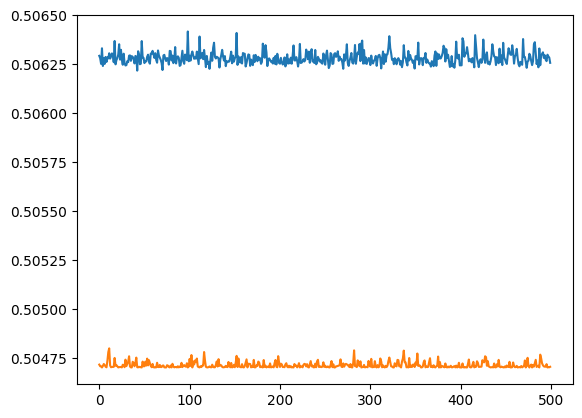

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])